<a href="https://colab.research.google.com/github/yamashita4140/potechi_buster/blob/master/potechi_buster_team_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# モジュールのインポート

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import japanize_matplotlib


import re
import os
import pickle


In [3]:
# イメージリストの取得

def list_imgs(directory, ext="jpg|jpeg|bmp|png|ppm"):
    return [os.path.join(root, f) for root, _, files in os.walk(directory) for f in files if
            re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# HyperParameters
batch_size = 90  # SampleProgram:5
num_classes = 7  # 分類クラス数(ポテチ7種)
epochs = 60  # 学習の繰り返し回数(SampleProgram:200)
dropout_rate = 0.2  # 過学習防止用(SampleProgram:0.2)

# 入力画像のパラメータ
img_width = 64  # 入力画像の幅
img_height = 64  # 入力画像の高さ
img_ch = 3  # 3ch(RGB)
# grayscale=True

# データ格納用ディレクトリパス
SAVE_DATA_DIR_PATH = "/content/drive/MyDrive/Hackason_E_team/image/"
os.makedirs(SAVE_DATA_DIR_PATH, exist_ok=True)

# グラフ画像のサイズ
FIG_SIZE_WIDTH = 12
FIG_SIZE_HEIGHT = 10
FIG_FONT_SIZE = 25

    

In [6]:
data_x = []  # データ本体
data_y = []  # 正解ラベル
num_classes = 7

# クラス0(コンソメパンチ)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "csp"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(0)  # 正解ラベル

# クラス1(九州しょうゆ)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "kss"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(1)  # 正解ラベル

# クラス2(のりしお)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "nrs"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(2)  # 正解ラベル

# クラス3(のりしおパンチ)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "nrp"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(3)  # 正解ラベル

# クラス4(しあわせバター)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "swb"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(4)  # 正解ラベル

# クラス5(しょうゆマヨ)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "shm"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(5)  # 正解ラベル

# クラス6(うすしお)の画像データ群を読み込み
for filepath in list_imgs(SAVE_DATA_DIR_PATH + "usu"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    data_x.append(img)
    data_y.append(6)  # 正解ラベル

In [7]:
# NumPy配列に変換
data_x = np.asarray(data_x)
data_y = np.asarray(data_y)

# 学習用データとテストデータに分割(テストデータ2割)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
y_test_before=y_test
y_train_before=y_train

# float32に変換、正規化
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [8]:
    # 正解ラベルを"one-hot encoding"
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # データセットの個数を表示
    print(x_train.shape, "x train samples")
    print(x_test.shape, "x test samples")
    print(y_train.shape, "y train samples")
    print(y_test.shape, "y test samples")

(1015, 64, 64, 3) x train samples
(254, 64, 64, 3) x test samples
(1015, 7) y train samples
(254, 7) y test samples


In [9]:
    # モデル構築
    model = Sequential()

    # 入力層:64*64*3
    # 2次元畳込み層
    # Conv2D:2次元畳込み層で、画像から特徴を抽出(活性化関数:relu)
    # 入力データにカーネルをかける(3*3の32種類のフィルタを各マスにかける)
    # 出力ユニット数:32(32枚分の出力データが得られる)
    model.add(Conv2D(32, (3, 3),
                     padding="same",
                     input_shape=x_train.shape[1:],
                     activation="relu"))

    # 2次元畳込み層
    model.add(Conv2D(32, (3, 3),
                     padding="same",
                     activation="relu"))

    # プーリング層
    # 特徴量を圧縮する層
    # 畳み込み層で抽出された特徴のいち感度を若干低下させ、
    # 対象とする特徴量の画像内での位置が若干変化した場合でも、
    # プーリング層の出力が普遍になるようにする。
    # 画像の空間サイズの大きさを小さくし、調整するパラメータ数を減らし、過学習を防止
    # pool_size=(2,2):2*2の大きさの最大プーリング層
    # 入力画像内の2*2の領域で最大の数値を出力
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # ドロップアウト(過学習防止)
    model.add(Dropout(dropout_rate))

    # 2次元畳込み層
    # 3*3の64種類のフィルタ
    # 出力ユニット数:64
    model.add(Conv2D(64, (3, 3),
                     padding="same",
                     activation="relu"))

    # 2次元畳込み層
    # 3*3の64種類のフィルタ
    # 出力ユニット数:64
    model.add(Conv2D(64, (3, 3),
                     padding="same",
                     activation="relu"))

    # プーリング層
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # ドロップアウト
    model.add(Dropout(dropout_rate))

    # 1次元ベクトル化
    model.add(Flatten())

    # 全結合層
    # 出力ユニット数:512
    model.add(Dense(512, activation="relu"))

    # ドロップアウト
    model.add(Dropout(dropout_rate))

    # 全結合層
    # 7分類なのでユニット数7。活性化関数はsoftmax関数
    # Softmax関数で総和が1となるように、各出力の予測確率を計算
    model.add(Dense(num_classes, activation="softmax"))

    # モデル構造の表示
    model.summary()

    # コンパイル(多クラス分類問題)
    # 最適化:RMSprop
    model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

In [10]:
    # 学習
    # verbose=1:標準出力にログを表示
    history = model.fit(x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_split=0.1)
    # テスト用データセットで学習済分類器に入力し、パフォーマンス計測
    score = model.evaluate(x_test,
                           y_test,
                           verbose=0)
    # 結果表示
    # 損失値(値が小さいほど良い)
    print("Validation loss:", score[0])

    # 正答率(値が大きいほど良い)
    print("Validation accuracy:", score[1])


   

Epoch 1/60
11/11 [==============================] - 8s 76ms/step - loss: 3.2799 - accuracy: 0.1455 - val_loss: 1.9418 - val_accuracy: 0.1667
Epoch 2/60
11/11 [==============================] - 0s 27ms/step - loss: 1.9389 - accuracy: 0.1728 - val_loss: 2.0002 - val_accuracy: 0.0882
Epoch 3/60
11/11 [==============================] - 0s 27ms/step - loss: 1.9917 - accuracy: 0.1990 - val_loss: 1.8241 - val_accuracy: 0.4118
Epoch 4/60
11/11 [==============================] - 0s 28ms/step - loss: 1.6779 - accuracy: 0.3366 - val_loss: 1.4775 - val_accuracy: 0.5490
Epoch 5/60
11/11 [==============================] - 0s 28ms/step - loss: 1.4832 - accuracy: 0.4368 - val_loss: 1.3173 - val_accuracy: 0.5784
Epoch 6/60
11/11 [==============================] - 0s 27ms/step - loss: 1.1477 - accuracy: 0.5892 - val_loss: 1.5026 - val_accuracy: 0.5784
Epoch 7/60
11/11 [==============================] - 0s 28ms/step - loss: 1.0620 - accuracy: 0.6318 - val_loss: 1.7575 - val_accuracy: 0.4902
Epoch 8/60
11

In [11]:
# モデル構造の保存
open(SAVE_DATA_DIR_PATH + "model_cnn.json", "w").write(model.to_json())

# 学習済みの重みを保存
model.save_weights(SAVE_DATA_DIR_PATH + "weight_cnn.hdf5")

# 学習履歴を保存
with open(SAVE_DATA_DIR_PATH + "history_cnn.json", "wb") as f:
    pickle.dump(history.history, f)

In [12]:
from matplotlib import pyplot as plt


def plot_history(history,
                 save_graph_img_path,
                 fig_size_width,
                 fig_size_height,
                 lim_font_size):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    # グラフ表示
    plt.figure(figsize=(fig_size_width, fig_size_height))
    # plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = lim_font_size
    plt.subplot(121)

    # plot accuracy values
    plt.plot(epochs, acc, color="blue", linestyle="solid", label="train acc")
    plt.plot(epochs, val_acc, color="green", linestyle="solid", label="valid acc")
    plt.title("Training and Validation acc")
    plt.grid()
    plt.legend()

    # plot loss values
    # plt.subplot(122)
    plt.plot(epochs, loss, color="red", linestyle="solid", label="train loss")
    plt.plot(epochs, val_loss, color="orange", linestyle="solid", label="valid loss")
    plt.title("Training and Validation loss")
    plt.legend()
    plt.grid()

    plt.savefig(save_graph_img_path)
    plt.close()

In [13]:

# 学習過程をプロット
plot_history(history,
              save_graph_img_path=SAVE_DATA_DIR_PATH + "graph.png",
              fig_size_width=FIG_SIZE_WIDTH,
              fig_size_height=FIG_SIZE_HEIGHT,
              lim_font_size=FIG_FONT_SIZE)

In [14]:
def disp_result_sk(result, y_test):
    from sklearn import metrics

    label_name_list = ["Consomme-Punch", "Kyushu-Shoyu", "Nori-Shio", "Nori-Shio-Punch", "Shiawase-Butter",
                       "Shoyu-Mayo", "Usu-Shio"]

    ac_score = metrics.accuracy_score(y_test, result)

    cl_report = metrics.classification_report(y_test, result, target_names=label_name_list)
    conf_matrix = metrics.confusion_matrix(y_test, result)

    print("正解率= ", ac_score)
    print("レポート= \n", cl_report)
    print("Confusion Matrix= \n", conf_matrix)
    plot_heatmap(matrix=conf_matrix)


def plot_heatmap(matrix):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    import pandas as pd

    conf_matrix_df = pd.DataFrame(matrix)

    sns.heatmap(conf_matrix_df, annot=True, fmt="d")
    plt.xlabel("Prediction")
    plt.ylabel("Correct")
    plt.suptitle("Confusion_Matrix")
    plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


正解率=  0.952755905511811
レポート= 
                  precision    recall  f1-score   support

 Consomme-Punch       0.86      0.96      0.91        25
   Kyushu-Shoyu       1.00      0.94      0.97        32
      Nori-Shio       0.96      0.98      0.97        44
Nori-Shio-Punch       0.93      0.93      0.93        44
Shiawase-Butter       1.00      1.00      1.00        36
     Shoyu-Mayo       0.91      0.89      0.90        36
       Usu-Shio       1.00      0.97      0.99        37

       accuracy                           0.95       254
      macro avg       0.95      0.95      0.95       254
   weighted avg       0.95      0.95      0.95       254

Confusion Matrix= 
 [[24  0  0  1  0  0  0]
 [ 2 30  0  0  0  0  0]
 [ 0  0 43  0  0  1  0]
 [ 0  0  2 41  0  1  0]
 [ 0  0  0  0 36  0  0]
 [ 2  0  0  2  0 32  0]
 [ 0  0  0  0  0  1 36]]


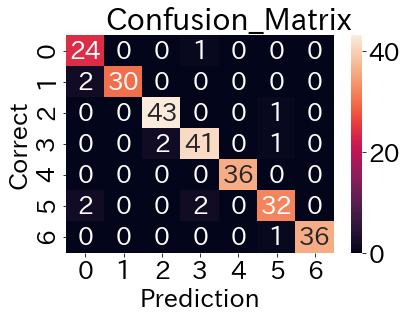

In [15]:
predict=model.predict_classes(x_test)
disp_result_sk(result=predict,y_test=y_test_before)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


正解率=  0.9921182266009853
レポート= 
                  precision    recall  f1-score   support

 Consomme-Punch       0.99      0.98      0.99       163
   Kyushu-Shoyu       1.00      0.99      1.00       138
      Nori-Shio       0.99      1.00      0.99       158
Nori-Shio-Punch       0.99      0.99      0.99       134
Shiawase-Butter       0.99      1.00      1.00       130
     Shoyu-Mayo       0.99      0.99      0.99       139
       Usu-Shio       1.00      0.99      0.99       153

       accuracy                           0.99      1015
      macro avg       0.99      0.99      0.99      1015
   weighted avg       0.99      0.99      0.99      1015

Confusion Matrix= 
 [[160   0   2   0   0   1   0]
 [  0 137   0   0   1   0   0]
 [  0   0 158   0   0   0   0]
 [  0   0   0 133   0   1   0]
 [  0   0   0   0 130   0   0]
 [  1   0   0   0   0 138   0]
 [  0   0   0   2   0   0 151]]


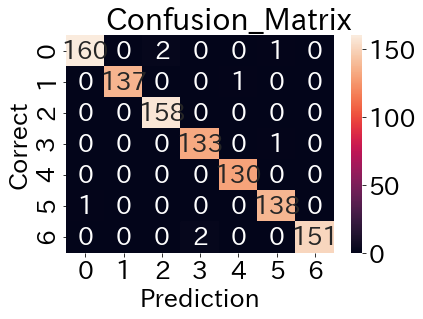

In [16]:
predict=model.predict_classes(x_train)
disp_result_sk(result=predict,y_test=y_train_before)


In [17]:
model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 4, 6, 2, 2, 5, 0, 3, 2, 0, 1, 0, 1, 6, 5, 4, 0, 5, 5, 3, 2, 1,
       0, 6, 4, 2, 2, 4, 6, 2, 0, 0, 0, 5, 0, 4, 2, 3, 0, 3, 1, 3, 6, 3,
       6, 4, 6, 4, 2, 6, 4, 6, 6, 2, 3, 5, 1, 3, 3, 6, 4, 2, 4, 0, 0, 0,
       1, 5, 1, 2, 0, 1, 6, 4, 6, 4, 1, 6, 2, 3, 5, 2, 0, 5, 2, 4, 3, 5,
       2, 6, 2, 3, 2, 6, 5, 3, 5, 5, 3, 1, 6, 5, 6, 0, 1, 2, 2, 5, 0, 2,
       1, 2, 1, 5, 5, 1, 0, 1, 4, 5, 6, 4, 4, 5, 0, 6, 2, 0, 3, 2, 6, 6,
       6, 5, 5, 3, 4, 4, 6, 3, 3, 4, 1, 3, 3, 5, 3, 2, 4, 3, 2, 3, 2, 0,
       3, 6, 0, 4, 5, 1, 2, 2, 3, 2, 6, 6, 0, 0, 4, 5, 2, 2, 1, 6, 5, 2,
       3, 3, 5, 5, 1, 2, 4, 1, 5, 4, 0, 3, 6, 1, 1, 4, 3, 5, 0, 4, 4, 3,
       3, 3, 4, 5, 3, 1, 6, 3, 0, 2, 5, 0, 2, 1, 4, 2, 1, 1, 3, 6, 4, 6,
       4, 1, 6, 2, 2, 5, 5, 4, 4, 2, 2, 4, 3, 2, 6, 5, 1, 5, 1, 3, 4, 3,
       3, 6, 3, 3, 2, 4, 2, 3, 3, 2, 6, 3])

In [18]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
predict==y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

**↓最終判定**

In [20]:
# 保存したモデルの読み込み
from keras.models import model_from_json

model = model_from_json(open(SAVE_DATA_DIR_PATH + "model_cnn_64_64_best.json","r").read())
model.load_weights(SAVE_DATA_DIR_PATH + "weight_cnn_64_64_best.hdf5")

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])


In [21]:
# テストデータの読み込み

TEST_DATA_DIR_PATH="/content/drive/MyDrive/Hackason_E_team/image/test/"


test_data_x = []  # データ本体
test_data_y = []  # 正解ラベル
num_classes = 7

# クラス0(コンソメパンチ)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "csp"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(0)  # 正解ラベル

# クラス1(九州しょうゆ)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "kss"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(1)  # 正解ラベル

# クラス2(のりしお)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "nrs"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(2)  # 正解ラベル

# クラス3(のりしおパンチ)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "nrp"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(3)  # 正解ラベル

# クラス4(しあわせバター)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "swb"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(4)  # 正解ラベル

# クラス5(しょうゆマヨ)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "shm"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(5)  # 正解ラベル

# クラス6(うすしお)の画像データ群を読み込み
for filepath in list_imgs(TEST_DATA_DIR_PATH + "usu"):
    img = img_to_array(load_img(filepath, target_size=(img_width, img_height, img_ch)))
    # img = img_to_array(load_img(filepath, grayscale=True,target_size=(img_width, img_height)))
    test_data_x.append(img)
    test_data_y.append(6)  # 正解ラベル

In [22]:
# NumPy配列に変換
test_data_x = np.asarray(test_data_x)
test_data_y = np.asarray(test_data_y)

test_data_y_before=test_data_y


# float32に変換、正規化
test_data_x = test_data_x.astype("float32")

test_data_x /= 255


In [23]:
# 正解ラベルを"one-hot encoding"
test_data_y = to_categorical(test_data_y, num_classes)


# データセットの個数を表示
print(test_data_x.shape, "test_data_x samples")
print(test_data_y.shape, "test_data_y samples")

(304, 64, 64, 3) test_data_x samples
(304, 7) test_data_y samples


In [24]:
# 最終判定

# テスト用データセットで学習済分類器に入力し、パフォーマンス計測
score = model.evaluate(test_data_x,test_data_y,verbose=0)
# print(score)
# 結果表示
# 損失値(値が小さいほど良い)
print("Test loss:", score[0])

# 正答率(値が大きいほど良い)
print("Test accuracy:", score[1])


Test loss: 0.45806804299354553
Test accuracy: 0.9605262875556946


正解率=  0.9605263157894737
レポート= 
                  precision    recall  f1-score   support

 Consomme-Punch       0.90      0.98      0.94        46
   Kyushu-Shoyu       0.95      0.88      0.91        41
      Nori-Shio       1.00      1.00      1.00        49
Nori-Shio-Punch       0.95      0.90      0.93        42
Shiawase-Butter       1.00      1.00      1.00        39
     Shoyu-Mayo       0.95      0.98      0.96        42
       Usu-Shio       0.98      0.98      0.98        45

       accuracy                           0.96       304
      macro avg       0.96      0.96      0.96       304
   weighted avg       0.96      0.96      0.96       304

Confusion Matrix= 
 [[45  0  0  1  0  0  0]
 [ 3 36  0  0  0  2  0]
 [ 0  0 49  0  0  0  0]
 [ 2  1  0 38  0  0  1]
 [ 0  0  0  0 39  0  0]
 [ 0  1  0  0  0 41  0]
 [ 0  0  0  1  0  0 44]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


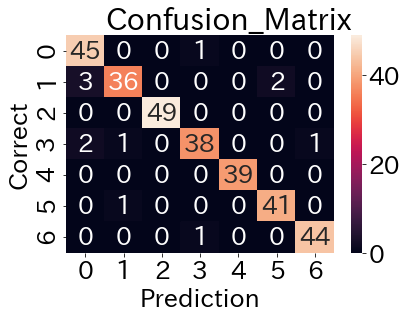

In [25]:
# 混合行列作成

predict=model.predict_classes(test_data_x)
disp_result_sk(result=predict,y_test=test_data_y_before)

